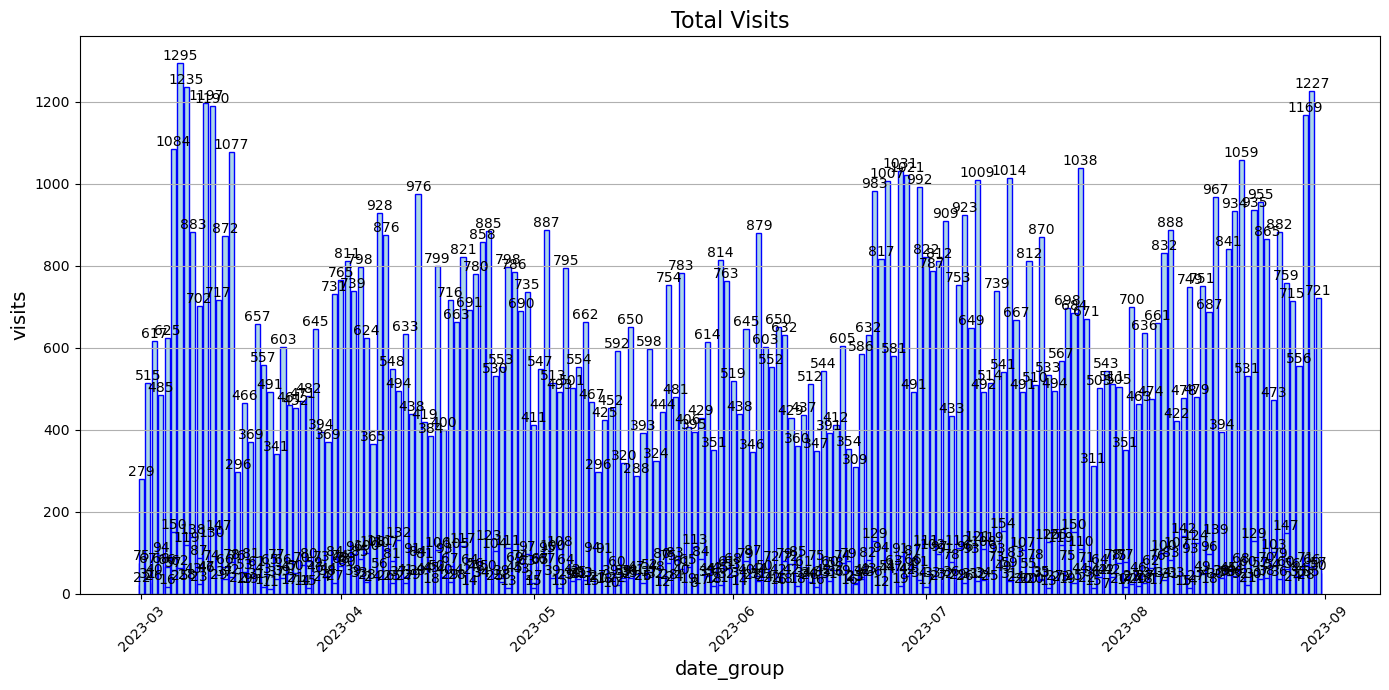

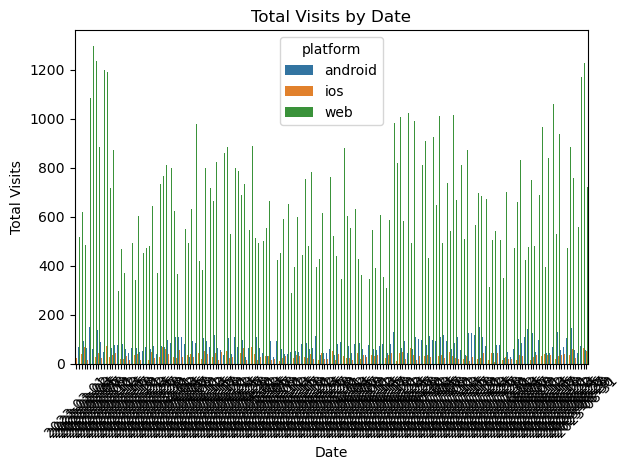

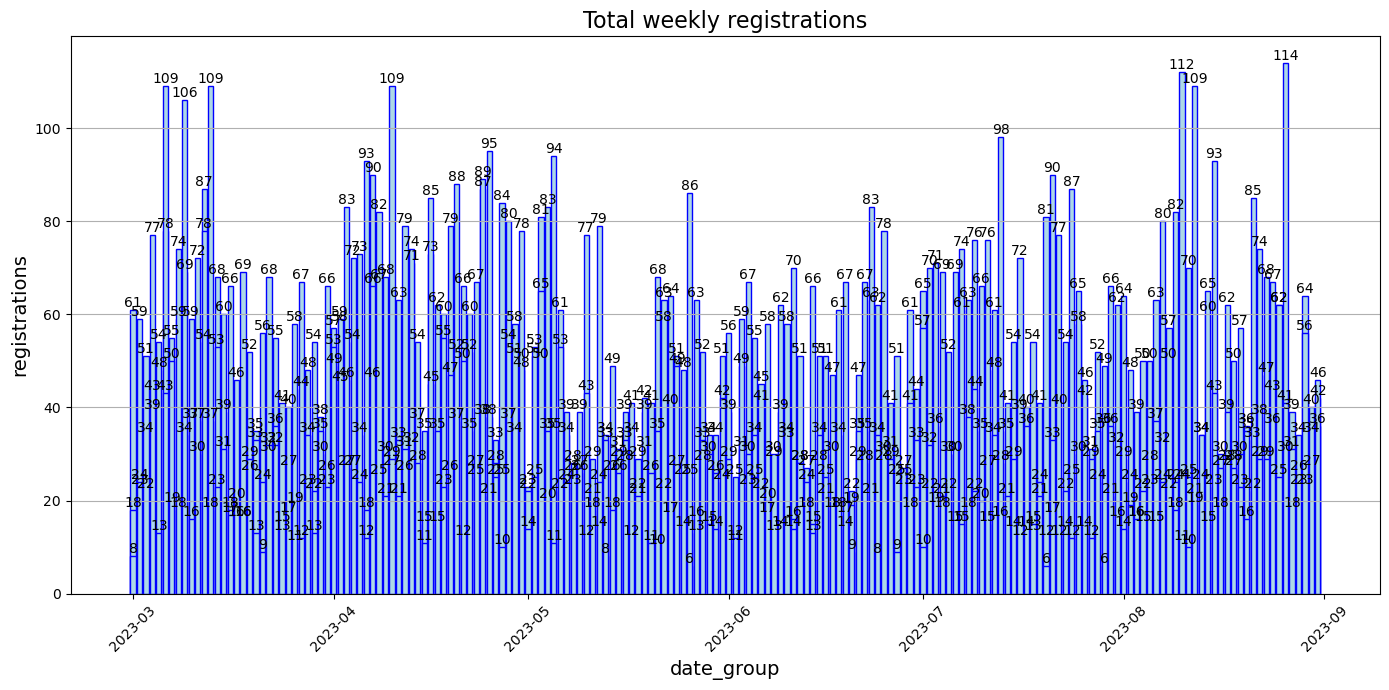

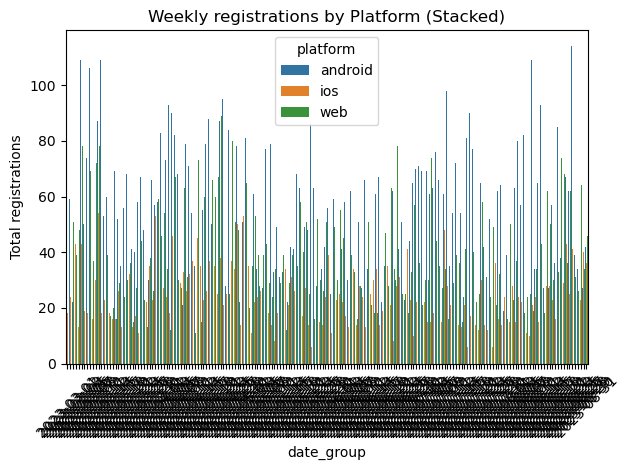

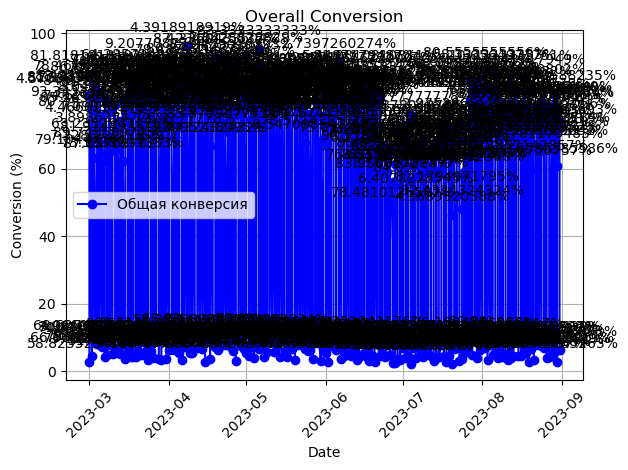

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Создаем директорию ./charts, если она не существует
os.makedirs("./charts", exist_ok=True)

# грузим все источники
visits = pd.read_json("visits.json")
conversion = pd.read_json("conversion.json")
ads = pd.read_json("ads.json")
registration = pd.read_json("registrations.json")

# сначала посещения
# преобразовываем в дату
conversion["date_group"] = pd.to_datetime(conversion["date_group"], unit="ms").dt.date
plt.figure(figsize=(14, 7))
bars = plt.bar(
    conversion["date_group"], conversion["visits"], color="lightblue", edgecolor="blue"
)

# Настройка графика
plt.title("Total Visits", fontsize=16)
plt.xlabel("date_group", fontsize=14)
plt.ylabel("visits", fontsize=14)
plt.xticks(rotation=45)  # Поворачиваем метки на оси X для удобочитаемости
plt.grid(axis="y")
for bar in bars:
    yval = bar.get_height()  # Получаем высоту текущего столбца
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        int(yval),
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Отображаем график
plt.tight_layout()
plt.savefig("./charts/total_visits.png")  # Сохраняем график
plt.show()

# Итоговые визиты с разбивкой по платформам
visit_by_platform = conversion[["date_group", "platform", "visits"]]
sns.barplot(x="date_group", y="visits", data=conversion, hue="platform")

# Настраиваем заголовок и метки
plt.title("Total Visits by Date")
plt.xlabel("Date")
plt.ylabel("Total Visits")

# Поворачиваем метки по оси X для лучшей читаемости
plt.xticks(rotation=45)

# Отображаем график
plt.tight_layout()
plt.savefig("./charts/total_visits_by_platform.png")  # Сохраняем график
plt.show()

# Итоговые регистрации
plt.figure(figsize=(14, 7))
bars = plt.bar(
    conversion["date_group"],
    conversion["registrations"],
    color="lightblue",
    edgecolor="blue",
)

# Настройка графика
plt.title("Total weekly registrations", fontsize=16)
plt.xlabel("date_group", fontsize=14)
plt.ylabel("registrations", fontsize=14)
plt.xticks(rotation=45)  # Поворачиваем метки на оси X для удобочитаемости
plt.grid(axis="y")
for bar in bars:
    yval = bar.get_height()  # Получаем высоту текущего столбца
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        int(yval),
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Отображаем график
plt.tight_layout()
plt.savefig("./charts/total_registrations.png")  # Сохраняем график
plt.show()

# Итоговые регистрации с разбивкой по платформе
visit_by_platform = conversion[["date_group", "platform", "registrations"]]
sns.barplot(x="date_group", y="registrations", data=conversion, hue="platform")

# Настраиваем заголовок и метки
plt.title("Weekly registrations by Platform (Stacked)")
plt.xlabel("date_group")
plt.ylabel("Total registrations")

# Поворачиваем метки по оси X для лучшей читаемости
plt.xticks(rotation=45)

# Отображаем график
plt.tight_layout()
plt.savefig("./charts/registrations_by_platform.png")  # Сохраняем график
plt.show()

# график конверсий
df = conversion
plt.plot(
    df["date_group"],
    df["conversion"],
    marker="o",
    linestyle="-",
    color="b",
    label="Общая конверсия",
)

# Добавляем подписи к точкам
for i, txt in enumerate(df["conversion"]):
    plt.annotate(
        f"{txt}%",
        (df["date_group"][i], df["conversion"][i]),
        textcoords="offset points",
        xytext=(0, 10),
        ha="center",
    )

# Настраиваем заголовок и метки
plt.title("Overall Conversion")
plt.xlabel("Date")
plt.ylabel("Conversion (%)")
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.grid(True)  # Добавляем сетку
plt.legend()  # Добавляем легенду
plt.tight_layout()

# Показываем график
plt.savefig("./charts/overall_conversion.png")  # Сохраняем график
plt.show()
